# Customer Segmentation for E-commerce Personalization

## Dataset Information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Variables Table

| Variable Name | Role | Type | Demographic | Description | Units
| --- | --- | --- | --- | --- | --- |
| InvoiceNo | ID | Categorical |  | a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation |  | 
| StockCode | ID | Categorical |  | a 5-digit integral number uniquely assigned to each distinct product |  | 
| Description | Feature | Categorical |  | product name |  |
| Quantity | Feature | Integer |  | the quantities of each product (item) per transaction |  | 
| InvoiceDate | Feature | Date |  | the day and time when each transaction was generated |  | 
| UnitPrice | Feature | Continuous |  | product price per unit | sterling | 
| CustomerID | Feature | Categorical |  | a 5-digit integral number uniquely assigned to each customer |  | 
| Country | Feature | Categorical |  | the name of the country where each customer resides |  | 



## Additional Variable Information

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

## Import Libs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [3]:
df = pd.read_excel('Online Retail.xlsx')

### Getting Fast View

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


## Handling Missing & Duplicate Values

### Missing Data

In [8]:
# Count the number of null values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Customer ID is very crucial to data however about 24% of data is missing while negligible amount of data is missing regrding Description.

So we are going to remove Null Data.

In [9]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

### Duplicate Data

In [10]:
df.duplicated().sum()

5225

from above shown that data has 5225 duplicate items need to be removed as for our application same operation same time and same everything should not exist.

In [11]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

### Cancelled Transactions

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 


In [12]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


All quantity values are -ve showing this sould be quantity returned

In [13]:
# percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
cancelled_percentage

2.209141343213713

2.2 Cancelled percentage is a good sign for the vendor

### Stock Codes

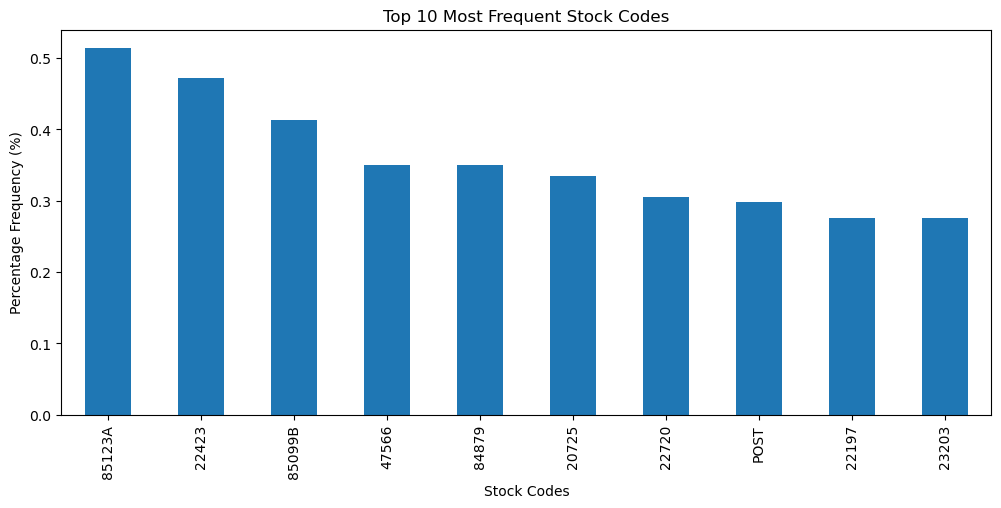

In [14]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='bar')

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Stock Codes')
plt.ylabel('Percentage Frequency (%)')
plt.show()

From the above data while stock codes should be 5 numbers there is non-normal data like ('POST') that we need to handle.

In [15]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
unique_stock_counts = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

pd.DataFrame(unique_stock_counts)

,0
5,3676
0,7
1,1


In [16]:
anomaly_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

pd.DataFrame(anomaly_stock_codes)

,0
0,POST
1,D
2,C2
3,M
4,BANK CHARGES
5,PADS
6,DOT
7,CRUK


it looks from above data that these data represent other items than purchasing/return itself Thus they need to be removed

In [17]:
df = df[~df['StockCode'].isin(anomaly_stock_codes)]

### Description

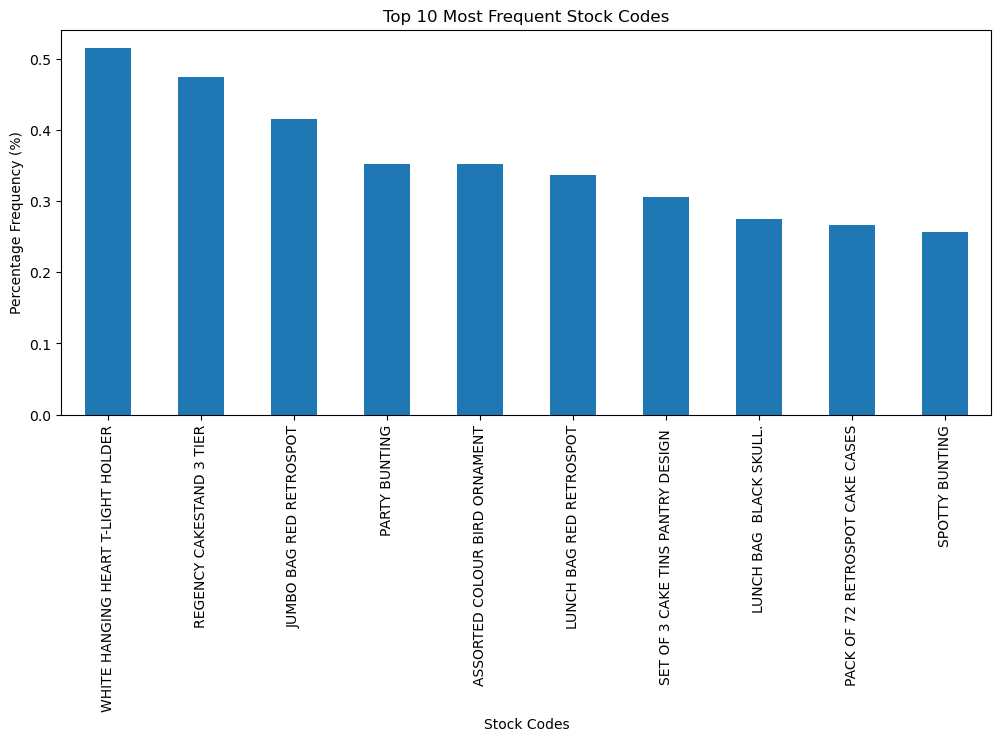

In [18]:
top_10_descriptions = df['Description'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_descriptions.plot(kind='bar')

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Stock Codes')
plt.ylabel('Percentage Frequency (%)')
plt.show()

Seems all Uppercase Items so we are going to check for anomaly

In [19]:
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]
pd.DataFrame(lowercase_descriptions)

,0
0,BAG 500g SWIRLY MARBLES
1,POLYESTER FILLER PAD 45x45cm
2,POLYESTER FILLER PAD 45x30cm
3,POLYESTER FILLER PAD 40x40cm
4,FRENCH BLUE METAL DOOR SIGN No
5,BAG 250g SWIRLY MARBLES
6,BAG 125g SWIRLY MARBLES
7,3 TRADITIONAl BISCUIT CUTTERS SET
8,NUMBER TILE COTTAGE GARDEN No
9,"FOLK ART GREETING CARD,pack/12"


some data are normal and can just be transformed into uppercase and others are just not products ex. ('High Resolution Image') that need to be removed

In [20]:
df.drop(df.index[df['Description'].isin(['Next Day Carriage','High Resolution Image'])], inplace=True)

In [21]:
df['Description'] = df['Description'].str.upper()

### Price
removing prices < or = Zero

In [22]:
df = df[df['UnitPrice'] > 0]

In [23]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

# Getting the number of rows in the dataframe
df.shape[0]

399573

## Feature Engineering

RFM features are a way of creating new variables from the transactional data of customers, based on their recency, frequency, and monetary value of purchases. These features can help segment customers into different groups based on their buying behavior and preferences, and enable targeted marketing and personalized strategies. 

- Recency is the number of days since the last purchase date of a customer. It indicates how recently a customer has interacted with the business and how likely they are to make a repeat purchase.
- Frequency is the total number of transactions made by a customer within a given period. It shows how often a customer buys from the business and how loyal they are.
- Monetary value is the total amount of money spent by a customer within a given period. It reflects how much revenue a customer generates for the business and how valuable they are.

RFM features can be calculated by using the following steps:

- For each customer, find the most recent purchase date and calculate the recency by subtracting it from the current date.
- For each customer, count the number of invoices or orders and calculate the frequency.
- For each customer, sum up the total sales or revenue and calculate the monetary value.
- Optionally, assign scores or ranks to each customer based on their RFM values, using a predefined scale or method (such as quintiles or fixed ranges).
- Group customers into different segments based on their RFM scores or values, using a clustering algorithm (such as K-means) or a simple rule-based approach.

### Recency (R)

In [40]:
#InvoiceDate to datetime type
df['InvoiceDateTime'] = pd.to_datetime(df['InvoiceDate'])

#InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDateTime'].dt.date

# Find the most recent purchase date for each customer
customer_datas = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_datas.drop(columns=['InvoiceDay'], inplace=True)

In [41]:
customer_datas.head()

,CustomerID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0


### Frequency (F)

In [42]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_datas = pd.merge(customer_datas, total_transactions, on='CustomerID')
customer_datas = pd.merge(customer_datas, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased
0,12346.0,2,0
1,12347.0,7,2458
2,12348.0,4,2332
3,12349.0,1,630
4,12350.0,1,196


### Monetary (M)

In [43]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_datas = pd.merge(customer_datas, total_spend, on='CustomerID')
customer_datas = pd.merge(customer_datas, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,2,0,0.00,0.000000
1,12347.0,7,2458,4310.00,615.714286
2,12348.0,4,2332,1437.24,359.310000
3,12349.0,1,630,1457.55,1457.550000
4,12350.0,1,196,294.40,294.400000


### Unique Purchased

The number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference.

In [44]:
#number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_datas = pd.merge(customer_datas, unique_products_purchased, on='CustomerID')

customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,2,0,0.00,0.000000,1
1,12347.0,7,2458,4310.00,615.714286,103
2,12348.0,4,2332,1437.24,359.310000,21
3,12349.0,1,630,1457.55,1457.550000,72
4,12350.0,1,196,294.40,294.400000,16


### Behavioral Feature


- __Average Days Between Purchases__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

    
- __Favorite Shopping Day__: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

    
- __Favorite Shopping Hour__: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

In [45]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_datas = pd.merge(customer_datas, average_days_between_purchases, on='CustomerID')
customer_datas = pd.merge(customer_datas, favorite_shopping_day, on='CustomerID')
customer_datas = pd.merge(customer_datas, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,1,196,294.40,294.400000,16,0.000000,2,16


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- __Average Days Between Purchases__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

    
- __Favorite Shopping Day__: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

    
- __Favorite Shopping Hour__: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

    
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [30]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases_x,Day_Of_Week_x,Hour_x,Average_Days_Between_Purchases_y,Day_Of_Week_y,Hour_y
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0.000000,2,16


### Geographic Features

- Country: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. 

In [46]:
df['Country'].value_counts(normalize=True).head()

United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: Country, dtype: float64

From Seen Above we can devide data into UK and others as about 90% of purchased is UK based

In [47]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_datas = pd.merge(customer_datas, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,1,196,294.40,294.400000,16,0.000000,2,16,0


In [48]:
# Display feature distribution
customer_datas['Is_UK'].value_counts()

1    3866
0     416
Name: Is_UK, dtype: int64

### Cancellation Insights

- Cancellation Rate: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.n.


In [49]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_datas = pd.merge(customer_datas, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_datas['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_datas['Cancellation_Rate'] = customer_datas['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


### Seasonality

- __Monthly_Spending_Mean__: This is the average amount a customer spends monthly.

    
- __Monthly_Spending_Std__: This feature indicates the variability in a customer's monthly spending. 

In [50]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Merge the new features into the customer_data dataframe
customer_datas = pd.merge(customer_datas, seasonal_buying_patterns, on='CustomerID')



,CustomerID,InvoiceDay,Days_Since_Last_Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [51]:
# Display the first few rows of the customer_data dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000
1,12347.0,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789
2,12348.0,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689
3,12349.0,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000
4,12350.0,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000


In [52]:

# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_datas['CustomerID'] = customer_datas['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_datas = customer_datas.convert_dtypes()

In [53]:
customer_datas.head(10)

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0
1,12347.0,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789
2,12348.0,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689
3,12349.0,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0
4,12350.0,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0
5,12352.0,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629
6,12353.0,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0
7,12354.0,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0
8,12355.0,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0
9,12356.0,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585


In [54]:
customer_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Total_Transactions              4282 non-null   Int64  
 2   Total_Products_Purchased        4282 non-null   Int64  
 3   Total_Spend                     4282 non-null   Float64
 4   Average_Transaction_Value       4282 non-null   Float64
 5   Unique_Products_Purchased       4282 non-null   Int64  
 6   Average_Days_Between_Purchases  4282 non-null   Float64
 7   Day_Of_Week                     4282 non-null   Int64  
 8   Hour                            4282 non-null   Int64  
 9   Is_UK                           4282 non-null   Int64  
 10  Cancellation_Frequency          4282 non-null   Int64  
 11  Cancellation_Rate               4282 non-null   Float64
 12  Monthly_Spending_Mean           42

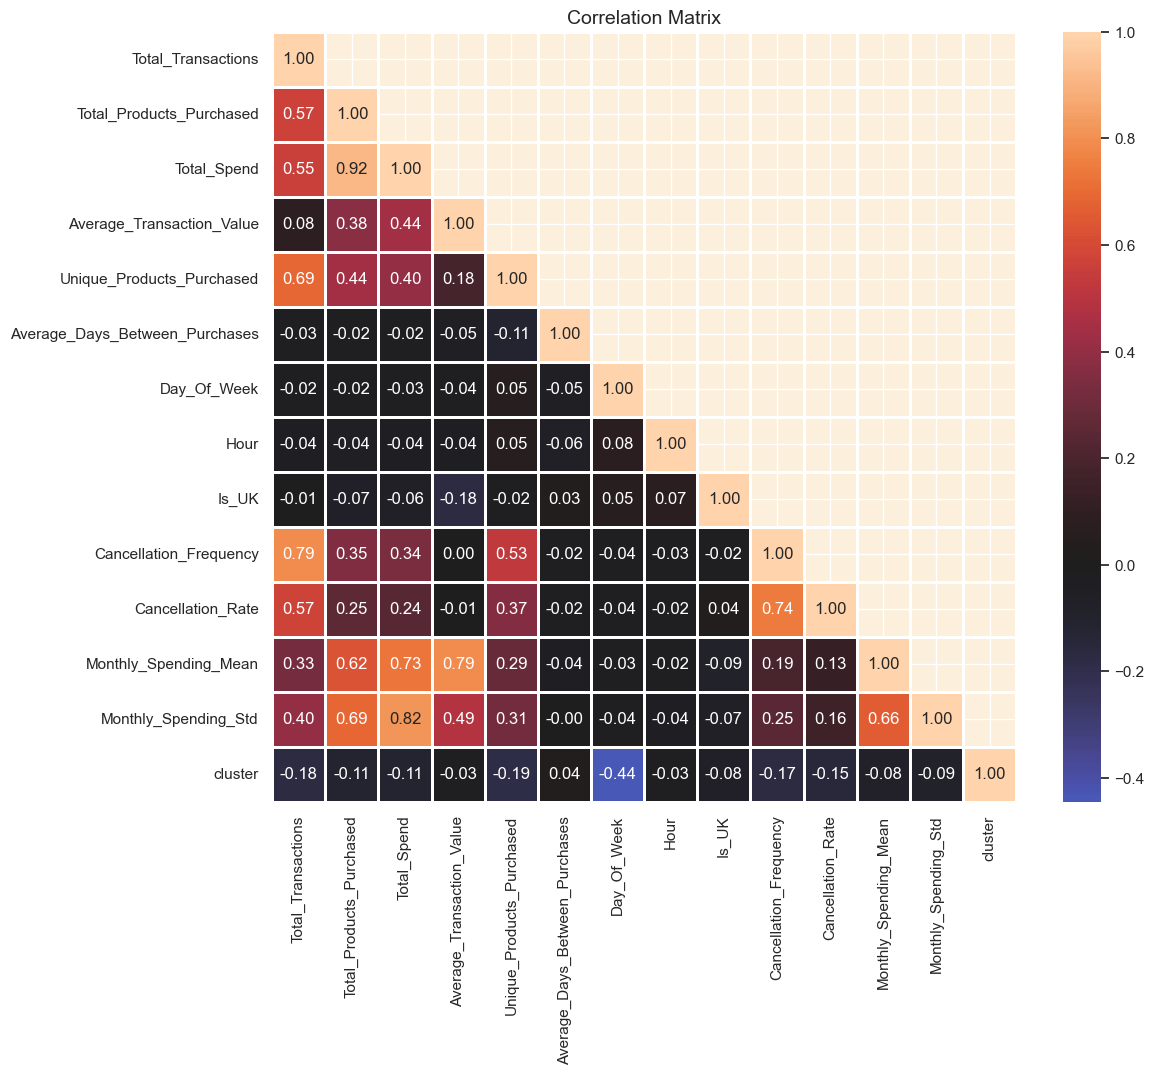

In [82]:
# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_datas.drop(columns=['CustomerID']).corr()

# Define a custom colormap
#my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask = mask, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Looks like data much correlated between Cancelling rate & Frequency

## Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_datas.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_datas.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()
print(customer_data_scaled.columns)


Index(['CustomerID', 'Total_Transactions', 'Total_Products_Purchased',
       'Total_Spend', 'Average_Transaction_Value', 'Unique_Products_Purchased',
       'Average_Days_Between_Purchases', 'Day_Of_Week', 'Hour', 'Is_UK',
       'Cancellation_Frequency', 'Cancellation_Rate', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std'],
      dtype='object')


## Dimension Reduction

Application of dimensionality reduction techniques to simplify our data while retaining the essential information using PCA (Principal Component Analysis)

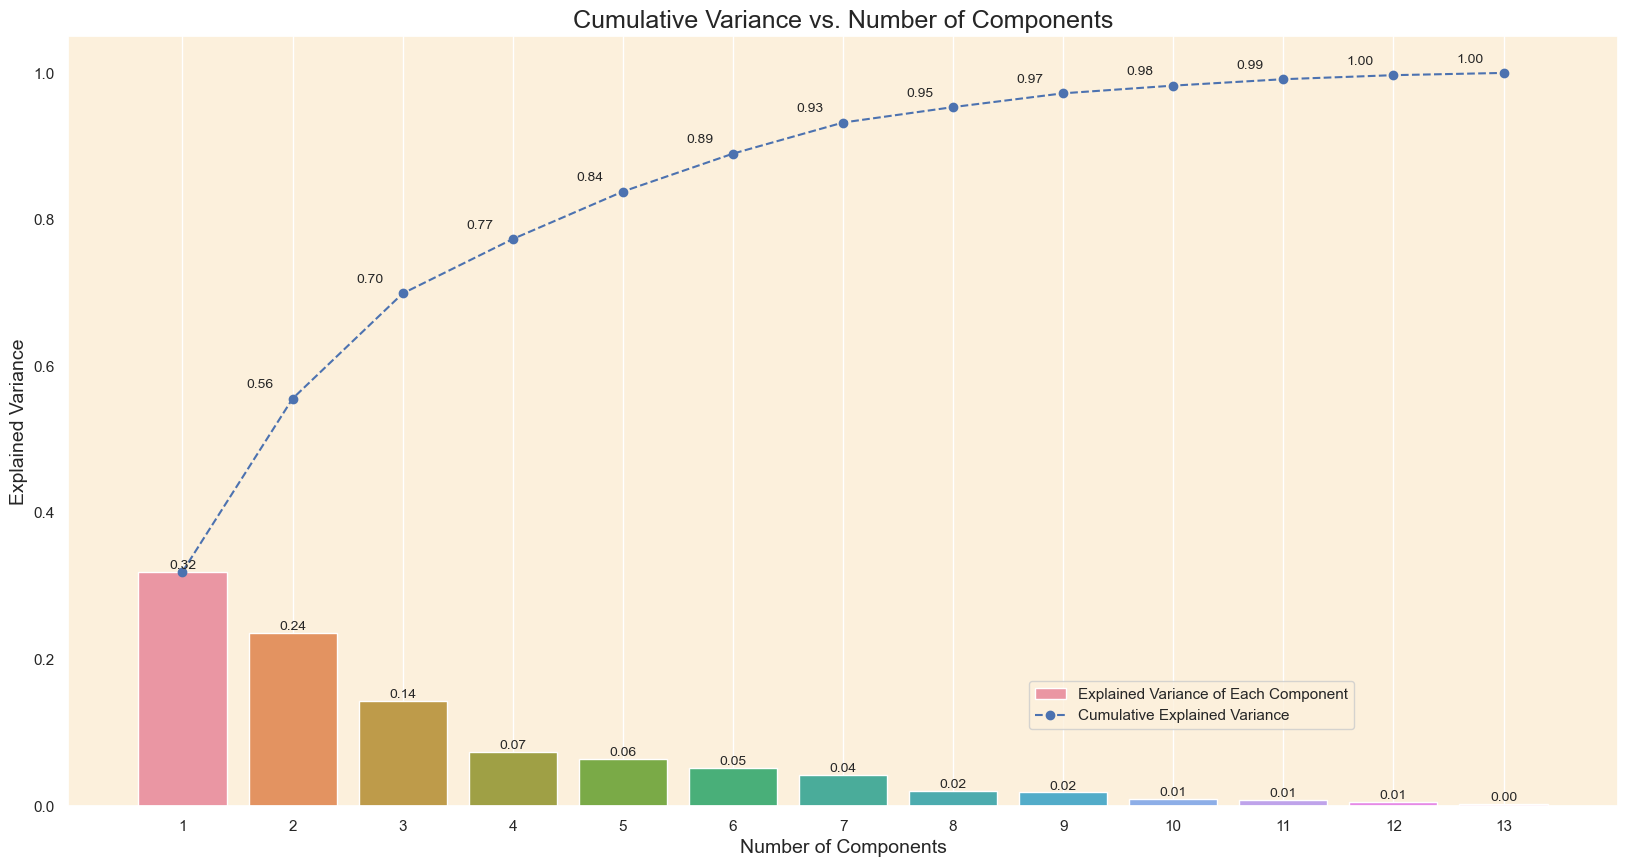

In [57]:
from sklearn.decomposition import PCA
customer_pca = customer_data_scaled

# Setting CustomerID as the index column
customer_pca.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_pca)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance'],
           loc=(0.62, 0.1),
           frameon=True)  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

based on above Data we can choose k=6 to be optimal 

In [58]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-0.743310,-1.682545,-0.482835,0.535867,-0.922337,-0.454436
12347.0,0.716035,-1.425626,0.620988,-0.768964,0.403184,0.038630
12348.0,-0.423306,0.533162,0.503528,-1.249861,2.530211,0.034331
12349.0,0.866688,-2.600641,1.919232,0.170813,-1.628491,1.940522
12350.0,-0.815268,-0.541769,0.371991,-1.209924,0.923034,-0.015350


now we show participation of features in 6 components to show the importances of each feature

In [59]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Total_Transactions,0.358384,0.043626,-0.347176,0.027894,0.009304,-0.090090
Total_Products_Purchased,0.395177,0.036466,0.124250,0.056786,0.065042,-0.385066
Total_Spend,0.412247,0.035230,0.183538,0.053392,0.063932,-0.320139
Average_Transaction_Value,0.241499,0.003529,0.419543,-0.087485,-0.099867,0.616381
Unique_Products_Purchased,0.295758,0.078455,-0.245851,-0.180223,-0.014974,-0.026555
Average_Days_Between_Purchases,-0.024352,-0.043023,0.012633,0.723438,0.640807,0.166661
Day_Of_Week,-0.094840,0.991132,0.024842,0.076812,-0.020196,0.021997
Hour,-0.025592,0.058014,-0.019930,-0.643946,0.751089,0.044554
Is_UK,-0.010968,0.006788,-0.020464,-0.000846,0.027390,-0.025160
Cancellation_Frequency,0.290184,0.022003,-0.463750,0.041815,-0.020884,0.195233


## K-Means Clustering

we are going to use K-means for clustering.
We will use Elbow Method to determine optimal K.
WCSS stands for within-cluster sum of squares, which is a measure of how compact the clusters are in k-means clustering. It is calculated by summing the squared distances between each data point and its cluster centroid. The lower the WCSS, the more similar the data points are within each cluster. The goal of k-means clustering is to minimize the WCSS by finding the optimal number and location of the cluster centroids.

One way to find the optimal number of clusters (k) is to use the elbow method, which plots the WCSS as a function of k and looks for a point where adding more clusters does not reduce the WCSS significantly. This point indicates a good trade-off between having too few or too many clusters.

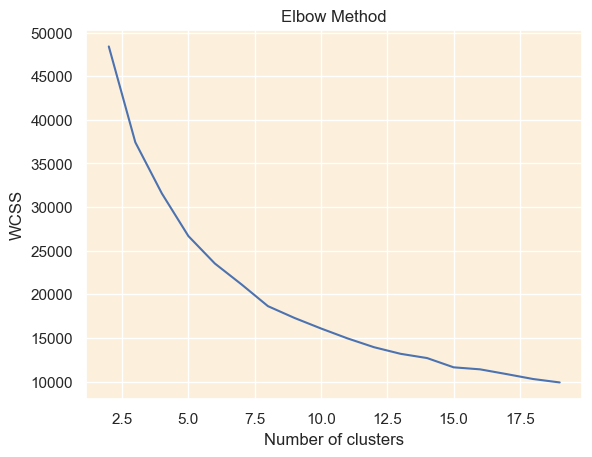

In [81]:
# Import the libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store the WCSS values
wcss = []

# Loop over a range of k values from 1 to 10
for k in range(2,20):
    # Create a k-means object with k clusters
    kmeans = KMeans(n_clusters=k,n_init = 10)
    # Fit the k-means object to the data
    kmeans.fit(customer_data_pca)
    # Append the WCSS value for the current k to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values as a function of k
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above Graph K of 4-5 might be good

In [77]:
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=1000, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in  {4: 1, 3: 0, 2: 2, 1: 3, 0: 4}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_datas['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

# Display the first few rows of the original dataframe
customer_datas.head()

,CustomerID,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,cluster
0,12346.0,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,3
1,12347.0,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,3
2,12348.0,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,4
3,12349.0,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,3
4,12350.0,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,3


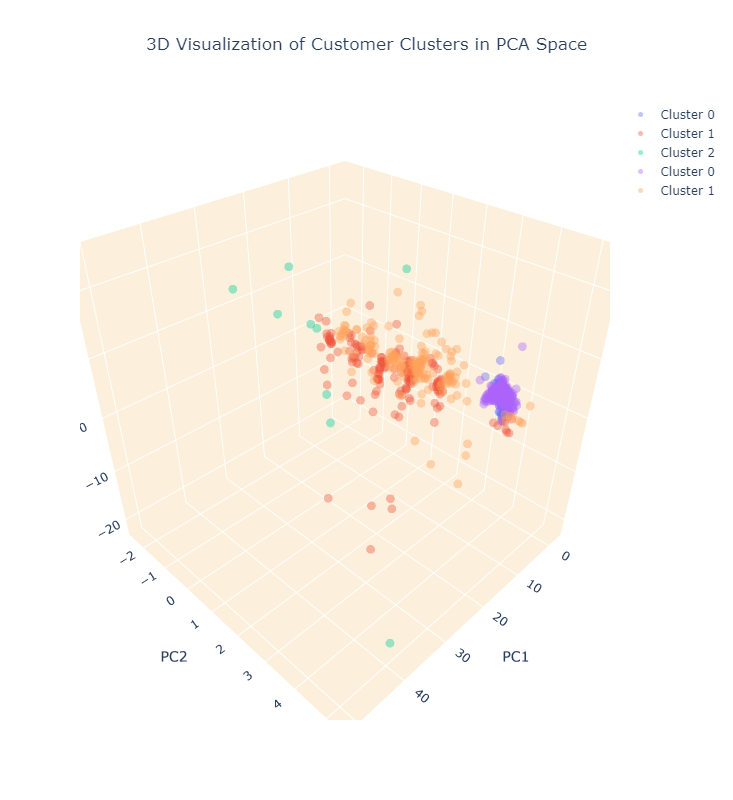

In [84]:
import plotly.graph_objects as go


# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]
cluster_3 = customer_data_pca[customer_data_pca['cluster'] == 3]
cluster_4 = customer_data_pca[customer_data_pca['cluster'] == 4]
#cluster_5 = customer_data_pca[customer_data_pca['cluster'] == 5]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_4['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 1'))
#fig.add_trace(go.Scatter3d(x=cluster_5['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
#                           mode='markers', marker=dict( size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

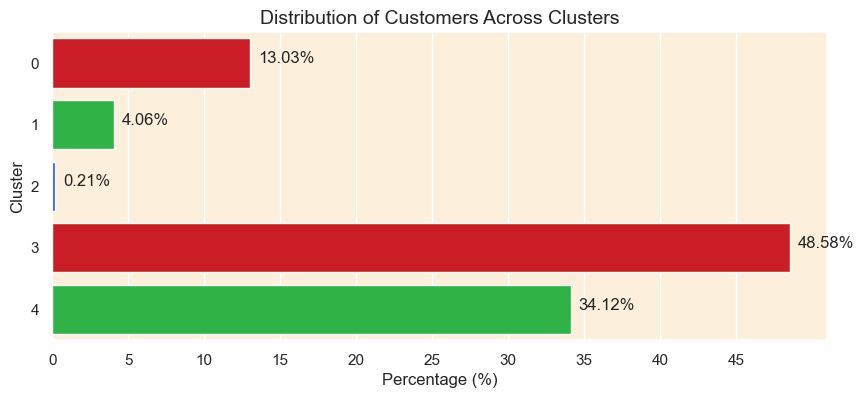

In [79]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

from above data 5 looks ok while cluster 2 seems to be noisedata or outliners that could be handled later